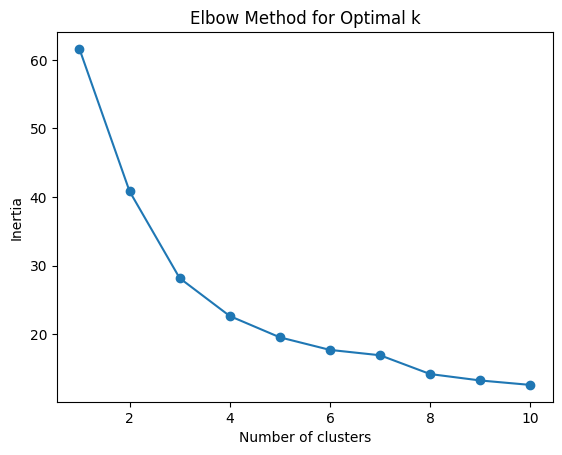

Cluster Counts:
Cluster
1    8
2    6
3    6
0    3
Name: count, dtype: int64

Centroids:
   FertilityRate  Ratio_MaletoFemale  PerFemEmployers  Agriculture  Industry  \
0      -1.179987            1.760630         2.119955    -1.204796  1.495678   
1      -0.755039            0.515276        -0.148633    -0.751433  0.640162   
2       1.368119           -1.065530        -0.472717     1.345307 -1.261205   
3       0.228593           -0.501819        -0.389083     0.259001 -0.340182   

   Services  Wage&Salaried  ContrFamWorkers  OwnAccount  Vulnerable  
0  0.986826       2.118494        -2.163713    1.955282   -2.132560  
1  0.808828      -0.427236        -0.110436    0.373434    0.421084  
2 -1.371529      -0.620612         0.772567   -0.771507    0.619064  
3 -0.200321       0.131013         0.456538   -0.704046   -0.114230  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("MLR2.csv")

# Преобразование столбца "FertilityRate" в числовой формат
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'], errors='coerce')

# Отбрасываем строки с пропущенными значениями
df.dropna(inplace=True)

# Выбираем только нужные столбцы для кластеризации
X = df[['FertilityRate', 'Ratio_MaletoFemale', 'PerFemEmployers', 'Agriculture', 'Industry', 'Services',
        'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']]

# Масштабируем данные
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

# Определение оптимального количества кластеров с помощью метода локтя
def calculate_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def assign_clusters(X, centers):
    clusters = []
    for i in range(len(X)):
        distances = [calculate_distance(X.iloc[i].values, center) for center in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def update_centers(X, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = X.iloc[[j for j, cluster in enumerate(clusters) if cluster == i]]
        center = cluster_points.mean()
        new_centers.append(center)
    return new_centers

def kmeans(X, k, max_iter=100):
    # Инициализация центроидов случайным образом
    centers = X.sample(k, random_state=42).values
    
    for _ in range(max_iter):
        # Назначение кластеров на основе ближайшего центроида
        clusters = assign_clusters(X, centers)
        
        # Обновление центроидов
        new_centers = update_centers(X, clusters, k)
        
        # Если центроиды перестали изменяться, завершаем итерацию
        if np.allclose(centers, new_centers):
            break
        
        centers = new_centers
    
    return centers, clusters

# Определение оптимального количества кластеров
inertia = []
for k in range(1, 11):
    centers, clusters = kmeans(X_scaled, k)
    inertia.append(sum(calculate_distance(X_scaled.iloc[i].values, centers[cluster]) for i, cluster in enumerate(clusters)))

# Визуализация методом локтя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Построение модели кластеризации с оптимальным количеством кластеров
k_optimal = 4  # Выбираем оптимальное количество кластеров
centers, clusters = kmeans(X_scaled, k_optimal)

# Получение меток кластеров и добавление их к исходным данным
df['Cluster'] = clusters

# Подсчет количества вхождений в кластеры
cluster_counts = df['Cluster'].value_counts()

# Вывод центроидов кластеров
centroids = pd.DataFrame(centers, columns=X.columns)

# Вывод результатов
print("Cluster Counts:")
print(cluster_counts)
print("\nCentroids:")
print(centroids)
